In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cement_data=pd.read_csv('concrete.csv')

In [3]:
cement_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
cement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
cement_data.shape

(1030, 9)

In [6]:
cement_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

From the above data, we can see that all the columns are Numeric there are no missing values. Hence there is no need to impute the dataframe for missing values

In [7]:
cement_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Multivariate analysis

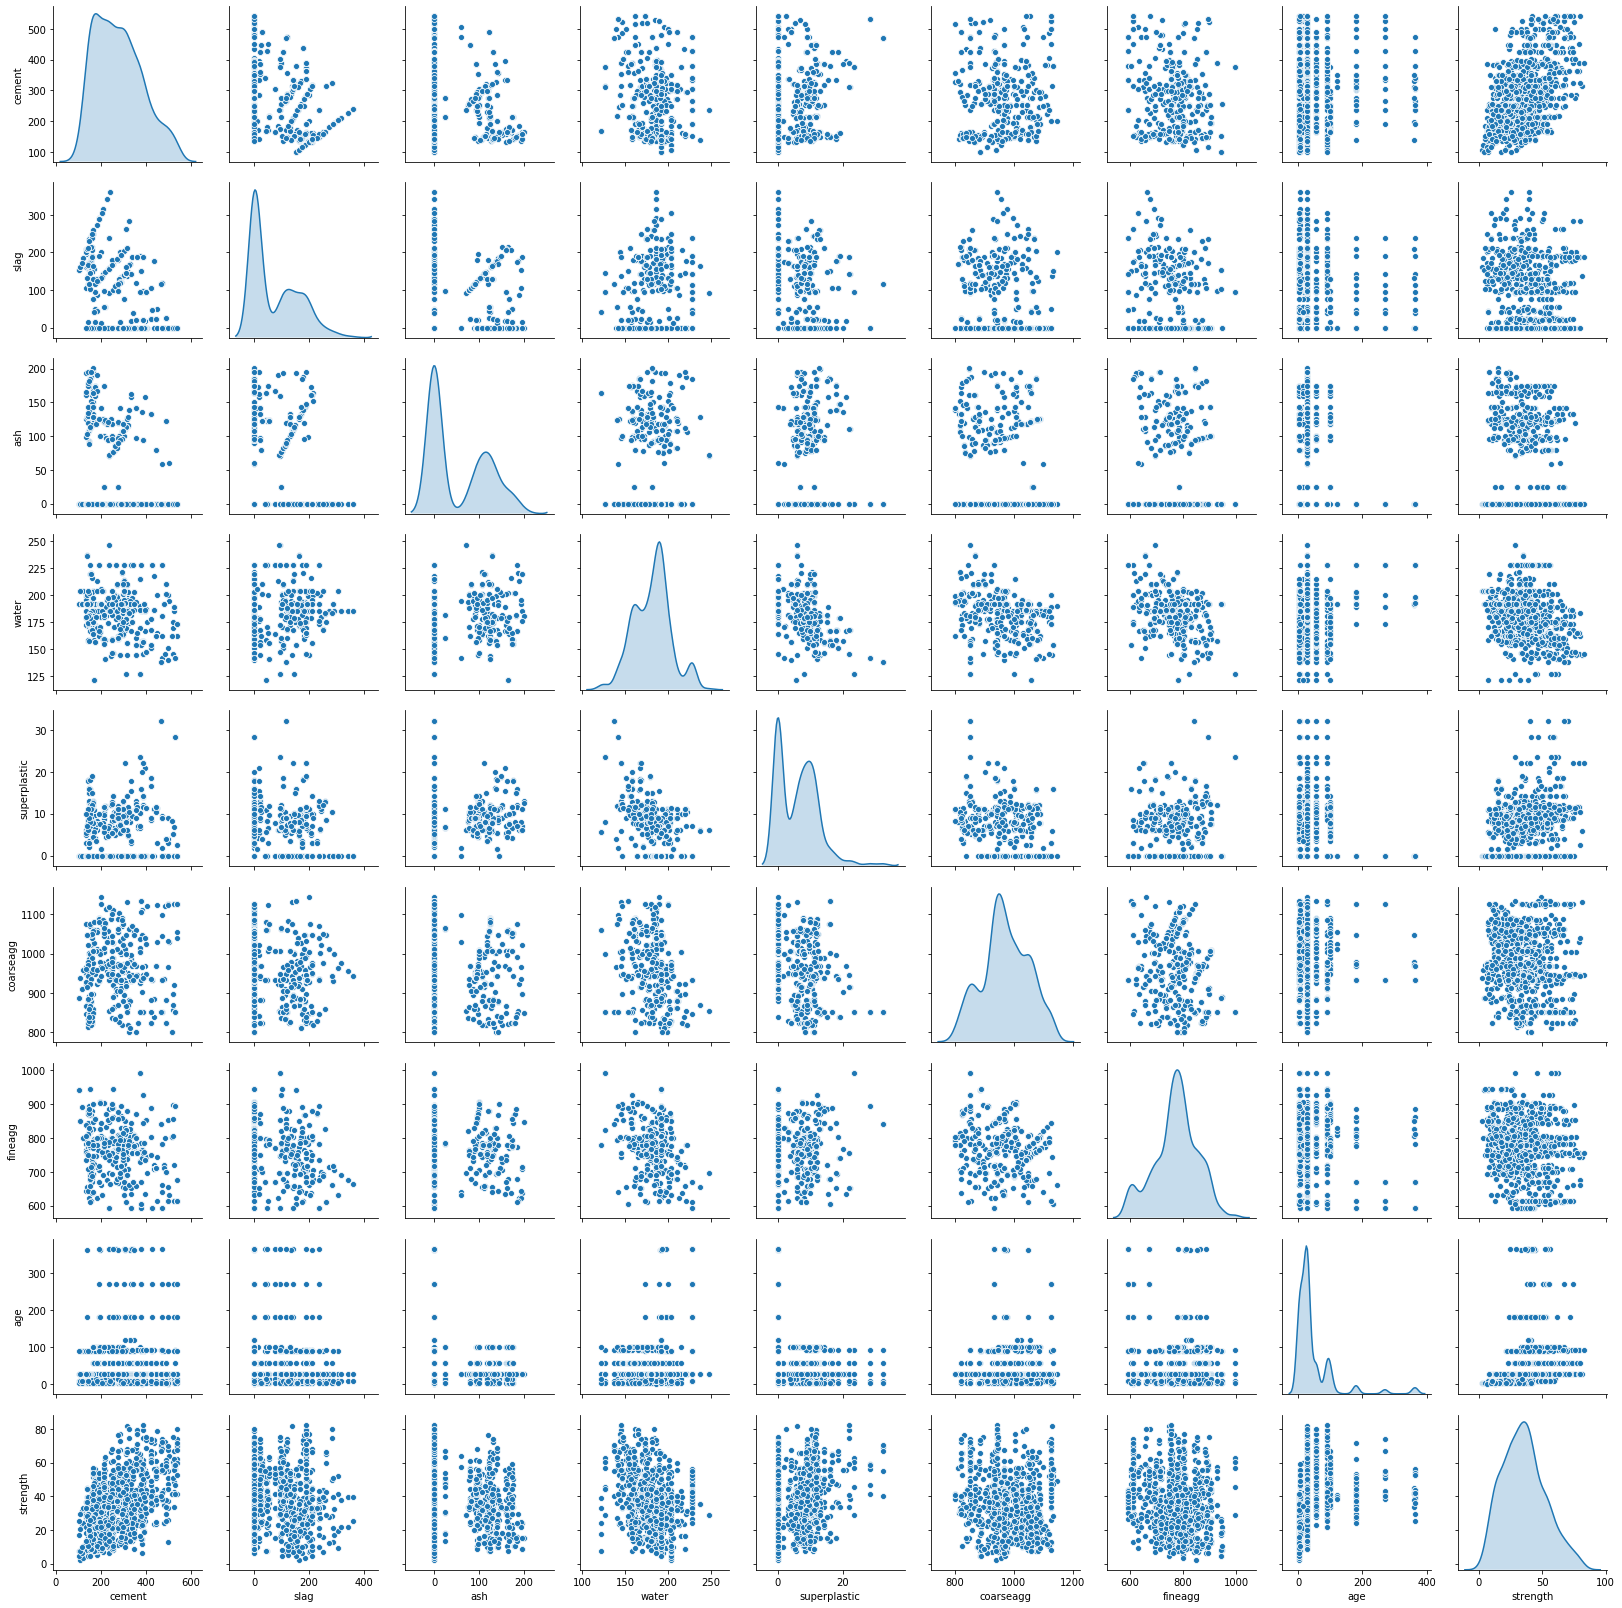

In [8]:
sns.pairplot(cement_data,hue=None,diag_kind='kde')

<ol>
    
    Looking at the above plot, There are atleast 4 to 12 clusters 
     1) Cement data is evenly distributed across the range.With Strength, eventhogh the distribution seems clouded and seems it do not have predictive power over strentgh, there is a tail seen with the Strength So we can say the cement has some. With increase in Cement, the Strength increeases.
    2) Slag is also evenly distributed. But by looking at the mean and the Max value, there may be Outliers in these values as the 75% values is around 142.95 but the Max is around 359.5.
    3) Ash has more values with Zero. Also the values are more evenly distributed with more values between 100 to200
    4) For Water, we can see a kind of a binomial distribution. There may be a few outliers in this fields  
    5) Superplastic has kind of a binomial distribution more concentration of values within the range of 0 to 20. There is a high poossiblity of Outliers in this field as the 75% values falls around 10.20 where as the Maximum value is 32.2
    6) Coarseagg has values spread across the entire range. Looking at the distribution, the possiblity of presence of Outliers is less for this column.
    7) Fineagg like Coarseagg is also has the data spread across the range with the data having a binomial distribution.
    8) Age is concentrated only within the range of around 150. Looking at the data, the 75% has a value of 56 where as the Max value is 365. So there is a highest possiblity for the presence of Outlier in this data.
    

###### Removing Outliers and replacing with mean values

In [9]:
for x in cement_data:
    q1= cement_data[x].quantile(0.25)
    q3= cement_data[x].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    cement_data[x] = np.where(((cement_data[x] < fence_low) | (cement_data[x] > fence_high)), cement_data[x].mean(), cement_data[x])

In [10]:
corr=cement_data.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275612,-0.397467,-0.090173,0.012610,-0.109349,-0.239031,-0.014159,0.493867
slag,-0.275612,1.000000,-0.321581,0.099040,0.059988,-0.284457,-0.284200,-0.035366,0.129677
ash,-0.397467,-0.321581,1.000000,-0.249885,0.447795,-0.009961,0.092040,0.026944,-0.098248
water,-0.090173,0.099040,-0.249885,1.000000,-0.657400,-0.156906,-0.424659,0.011081,-0.299735
superplastic,0.012610,0.059988,0.447795,-0.657400,1.000000,-0.223969,0.155018,0.022124,0.342454
coarseagg,-0.109349,-0.284457,-0.009961,-0.156906,-0.223969,1.000000,-0.160812,0.017592,-0.173063
fineagg,-0.239031,-0.284200,0.092040,-0.424659,0.155018,-0.160812,1.000000,0.020552,-0.176716
age,-0.014159,-0.035366,0.026944,0.011081,0.022124,0.017592,0.020552,1.000000,0.516036
strength,0.493867,0.129677,-0.098248,-0.299735,0.342454,-0.173063,-0.176716,0.516036,1.000000


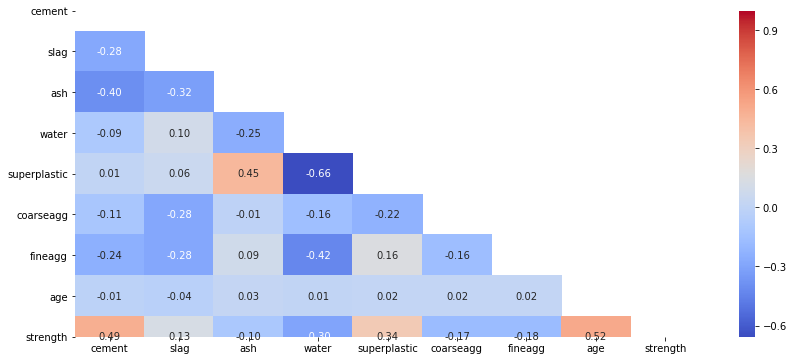

In [11]:
plt.figure(figsize=(14,6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
a = sns.heatmap(corr,mask=mask,annot=True,cmap='coolwarm',fmt='.2f')

There are no correlation seen between the columns

### MODEL BUILDING

In [12]:
from scipy.stats import zscore

cement_data_scale = cement_data.apply(zscore)

Splitting into traaining and test data

In [13]:
from sklearn.model_selection import train_test_split
X=cement_data_scale.drop(['strength'],axis=1)
y=cement_data_scale['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

#### SVM Regressor

In [14]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

C:\Users\Manojkumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_svm_pred = clr.predict(X_test)

C:\Users\Manojkumar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


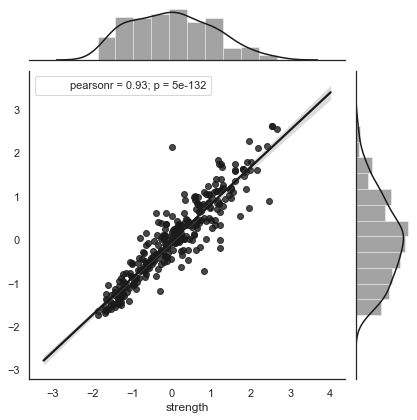

In [16]:
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    (sns.jointplot(x=y_test, y=y_svm_pred, kind="reg", color="k")).annotate(stats.pearsonr)


The SVM predicctor gives a good accuracy of around 93%. Trying the same with KMeans

In simple Linear regression we get only accuracy of around 83%

### KMeans Clustering

In [17]:
from sklearn.cluster import KMeans
cluster_range = range( 3, 12 )   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cement_data_scale)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,3,6378.605551
1,4,5591.156944
2,5,5108.162591
3,6,4650.951446
4,7,4247.810823
5,8,4029.371999
6,9,3863.858182
7,10,3583.251450
8,11,3438.956985


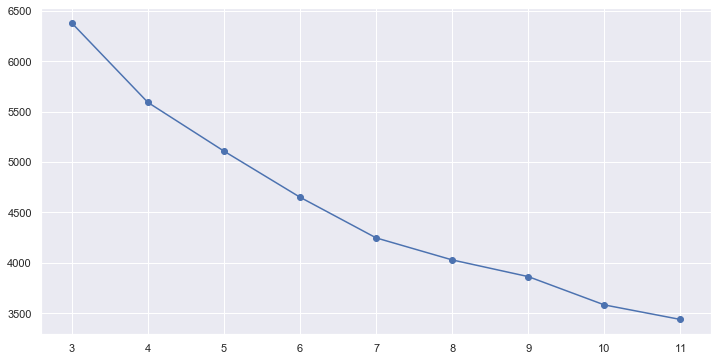

In [18]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

We can choose 4 to 5 Clusters

In [19]:
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(cement_data_scale)
y_kmeans_pred=cluster.predict(cement_data_scale)
cement_data_scale["GROUP"] = y_kmeans_pred    
cement_data_scale_copy = cement_data_scale.copy(deep = True)  

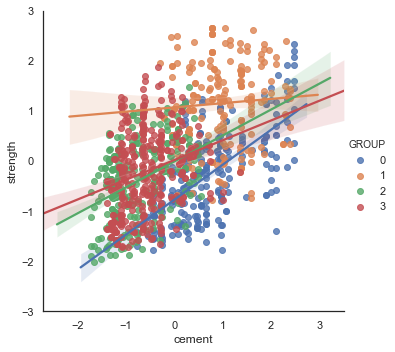

In [20]:
# Cement Vs strength

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-3,3))

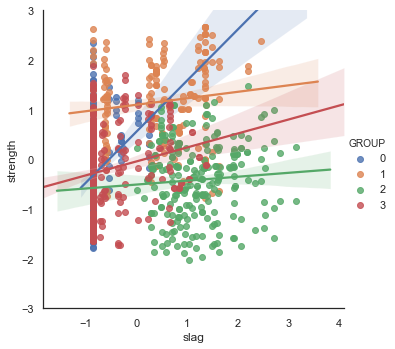

In [21]:
# slag Vs strength

var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-3,3))

Cluster 3 doesnot have a predictive power on strength

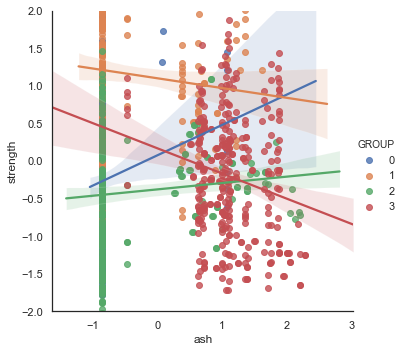

In [22]:
# ash Vs strength

var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-2,2))

Cluster 3 doesnot have a predictive power on strength

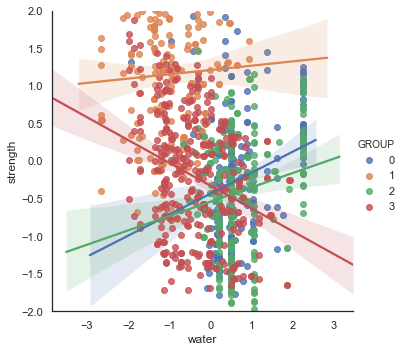

In [23]:
# water Vs strength

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-2,2))

All clusters have a predictive power on strength

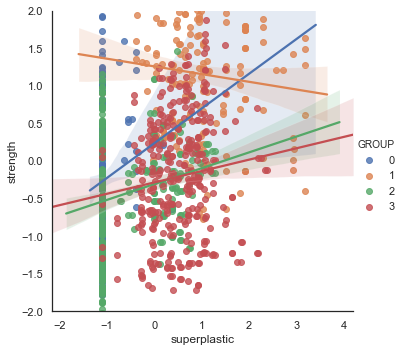

In [24]:
# Superplastic Vs strength

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-2,2))

Cluster 2 doesnot have a predictive power on strength

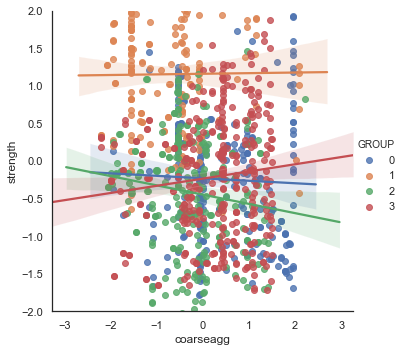

In [25]:
# coarseagg Vs strength

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-2,2))

Clusters 0 and 2 have very less predictive power over Strength

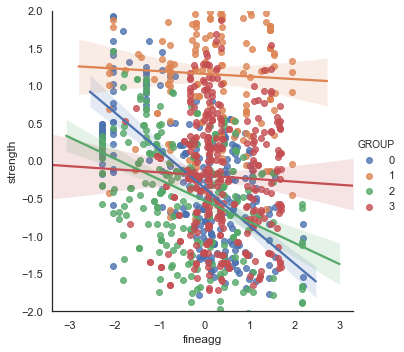

In [26]:
# fineagg Vs strength

var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-2,2))

Clusters 1 and 2 have very less predictive power over Strength

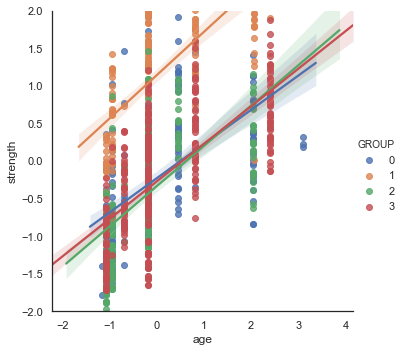

In [27]:
# age Vs strength

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cement_data_scale,hue='GROUP')
plot.set(ylim = (-2,2))

All clusters have very good power on predicting strength

###  Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print('Train score is:',regression_model.score(X_train, y_train))

Train score is: 0.7440865964512554


In [29]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.64515208  0.35406112  0.15620218 -0.20069119  0.11712821 -0.03158965
 -0.02071168  0.54615148]


In [30]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.44041959  0.14893154 -0.         -0.0791465   0.17446663 -0.
 -0.          0.42808837]


##### Comparing scores

In [31]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7440865964512554
0.6905499226359968


In [32]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7440856228574957
0.6905604424361531


In [33]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6800146529455044
0.6245401376836921


### SVM is giving a highest score of 93%.So we can go ahead with SVM as a simple model for predicting the strength

#### Tuning the model of SVM

In [34]:
## Trying with kernal as Poly with degree 3

clr_poly = svm.SVR(kernel='poly')  
clr_poly.fit(X_train , y_train)

C:\Users\Manojkumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_svm_pred_tun1 = clr_poly.predict(X_test)

C:\Users\Manojkumar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


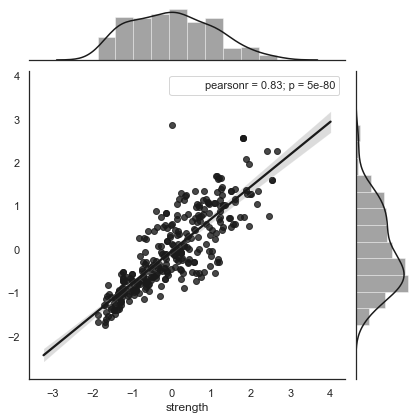

In [36]:
## Trying with kernal as linear

clr_lin = svm.SVR(kernel='linear')  
clr_lin.fit(X_train , y_train)
y_svm_pred_tun2 = clr_lin.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    (sns.jointplot(x=y_test, y=y_svm_pred_tun2, kind="reg", color="k")).annotate(stats.pearsonr)

#### Since rbf is giving a good results tuning it with different C and Gama values

In [37]:
from sklearn.model_selection import GridSearchCV 
parm_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid = GridSearchCV(svm.SVR(), parm_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_)

C:\Users\Manojkumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.291, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.264, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.322, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.737, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.713, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.780, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.558, total=   0.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.785, total=   0.5s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.839, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.855, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.867, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.811, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    4.7s finished


##### So the best fit is C=10 and gamma=0.1. Predicting the values using these values

C:\Users\Manojkumar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


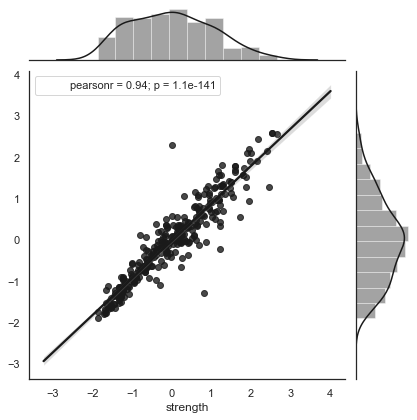

In [38]:
## Trying with kernal as linear

clr_final = svm.SVR(C=10,gamma=0.1)  
clr_final.fit(X_train , y_train)
y_svm_pred_final = clr_final.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    (sns.jointplot(x=y_test, y=y_svm_pred_final, kind="reg", color="k")).annotate(stats.pearsonr)

The accuracy has increased by 1% after using the Grid search CV and getting the values for C and Gamma.

### Conclusion
##### For predicting the Strength, SVM model with C=10 and gamma =0.1 can be used 